In [1]:
import requests as rq
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [3]:
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
from nba_api.stats.static import teams

In [4]:
players.find_players_by_full_name('Tim Duncan')

[{'id': 1495,
  'full_name': 'Tim Duncan',
  'first_name': 'Tim',
  'last_name': 'Duncan',
  'is_active': False}]

In [26]:
Tim_Duncan_career = playercareerstats.PlayerCareerStats(player_id='1495')
Tim_Duncan_career_stats_df = Tim_Duncan_career.get_data_frames()[0].head()
Tim_Duncan_career_stats_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1495,1997-98,00,1610612759,SAS,22.0,82,82,3204.0,706,...,0.662,274,703,977,224,55,206,279,254,1731
1,1495,1998-99,00,1610612759,SAS,23.0,50,50,1963.0,418,...,0.690,159,412,571,121,45,126,146,147,1084
2,1495,1999-00,00,1610612759,SAS,24.0,74,74,2875.0,628,...,0.761,262,656,918,234,66,165,242,210,1716
3,1495,2000-01,00,1610612759,SAS,25.0,82,82,3174.0,702,...,0.618,259,738,997,245,70,192,242,247,1820
4,1495,2001-02,00,1610612759,SAS,26.0,82,82,3329.0,764,...,0.799,268,774,1042,307,61,203,263,217,2089


In [8]:
from nba_api.stats.endpoints import shotchartdetail

In [13]:
Tim_Duncan_career = shotchartdetail.ShotChartDetail(team_id='1610612759',player_id='1495')
Tim_Duncan_career_df = Tim_Duncan_career.get_data_frames()[0]
Tim_Duncan_career_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0020000009,25,1495,Tim Duncan,1610612759,San Antonio Spurs,1,10,0,...,Right Side(R),8-16 ft.,10,108,2,1,1,20001031,SAS,IND
1,Shot Chart Detail,0020000009,83,1495,Tim Duncan,1610612759,San Antonio Spurs,1,2,57,...,Left Side(L),16-24 ft.,16,-153,47,1,1,20001031,SAS,IND
2,Shot Chart Detail,0020000009,105,1495,Tim Duncan,1610612759,San Antonio Spurs,1,1,1,...,Center(C),Less Than 8 ft.,4,-46,13,1,1,20001031,SAS,IND
3,Shot Chart Detail,0020000009,163,1495,Tim Duncan,1610612759,San Antonio Spurs,2,5,53,...,Center(C),Less Than 8 ft.,1,-10,2,1,1,20001031,SAS,IND
4,Shot Chart Detail,0020000009,230,1495,Tim Duncan,1610612759,San Antonio Spurs,3,11,17,...,Right Side(R),8-16 ft.,8,87,-2,1,1,20001031,SAS,IND


In [20]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

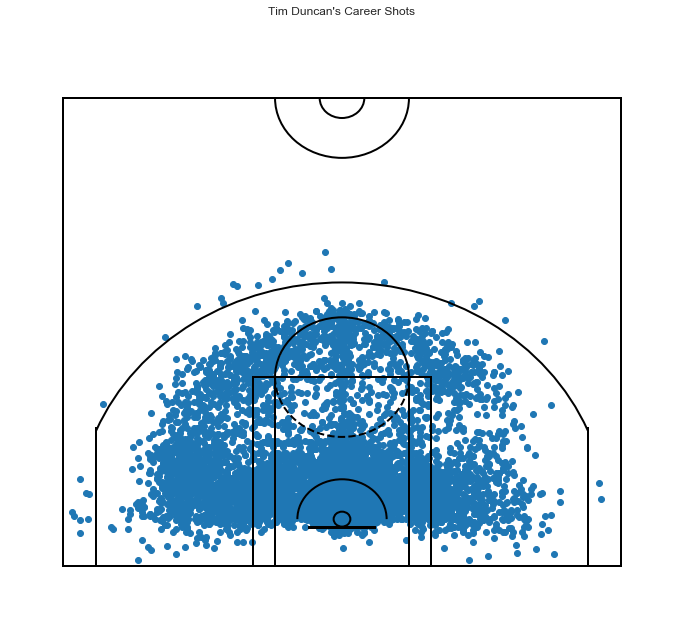

In [25]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(Tim_Duncan_career_df.LOC_X, Tim_Duncan_career_df.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.axis('off')
plt.title("Tim Duncan's Career Shots")
plt.xlabel("Baseline")
plt.ylabel("Sideline")
plt.show()

In [ ]:
# Find teams by full name.
teams.find_teams_by_full_name('cav')

# # Find teams by state.
# teams.find_teams_by_state('ohio')

# # Find teams by city.
# teams.find_teams_by_city('cleveland')

# # Find teams by team nickname.
# teams.find_teams_by_nickname('cav')

# # Find teams by year founded.
# teams.find_teams_by_year_founded(1968)

# # Find teams by abbreviation.
# teams.find_team_by_abbreviation('cle')

# # Find teams by id.
# teams.find_team_name_by_id(1610612739)

# # Get all teams.
# teams.get_teams()

In [ ]:
players.find_players_by_full_name('Tim Duncan')